<a href="https://colab.research.google.com/github/eRuaro/prac-research/blob/main/Makati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
path = '/content/drive/MyDrive/prac-research/actual/data/research-data-makati - Sheet1.csv'

import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt 
import sklearn

In [30]:
df = pd.read_csv(
    path, 
    low_memory=False,
    parse_dates=['time']
)

df.tail()

,name,region,country,longitude,latitude,time,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,air_pressure,precipitation,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain
523,Makati,Makati City,Philippines,121.03,14.57,2021-12-31 19:00:00,26.4,0,Clear,21.4,72,ENE,1015.10,0.04,70.13,15,28.0,0,0
524,Makati,Makati City,Philippines,121.03,14.57,2021-12-31 20:00:00,25.7,0,Partly cloudy,20.8,73,ENE,1015.12,0.04,70.07,25,27.2,0,1
525,Makati,Makati City,Philippines,121.03,14.57,2021-12-31 21:00:00,25.0,0,Partly cloudy,20.2,75,ENE,1015.15,0.04,70.00,35,26.5,0,0
526,Makati,Makati City,Philippines,121.03,14.57,2021-12-31 22:00:00,25.0,0,Partly cloudy,19.7,76,ENE,1015.83,0.04,68.53,39,26.5,0,1
527,Makati,Makati City,Philippines,121.03,14.57,2021-12-31 23:00:00,25.0,0,Partly cloudy,19.2,77,ENE,1016.51,0.05,67.07,44,26.6,0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               528 non-null    object        
 1   region             528 non-null    object        
 2   country            528 non-null    object        
 3   longitude          528 non-null    float64       
 4   latitude           528 non-null    float64       
 5   time               528 non-null    datetime64[ns]
 6   temp_c             528 non-null    float64       
 7   is_day             528 non-null    int64         
 8   condition          528 non-null    object        
 9   wind_kph           528 non-null    float64       
 10  wind_degree        528 non-null    int64         
 11  wind_dir           528 non-null    object        
 12  air_pressure       528 non-null    float64       
 13  precipitation      528 non-null    float64       
 14  relative_h

In [32]:
df.time.head()

0   2021-12-10 00:00:00
1   2021-12-10 01:00:00
2   2021-12-10 02:00:00
3   2021-12-10 03:00:00
4   2021-12-10 04:00:00
Name: time, dtype: datetime64[ns]

In [33]:
df.sort_values(by=['time'], ascending=True)

df.time.head()

0   2021-12-10 00:00:00
1   2021-12-10 01:00:00
2   2021-12-10 02:00:00
3   2021-12-10 03:00:00
4   2021-12-10 04:00:00
Name: time, dtype: datetime64[ns]

## Feature Engineering

In [34]:
df['year'] = df.time.dt.year
df['month'] = df.time.dt.month
df['day'] = df.time.dt.day
df['hour'] = df.time.dt.hour
df['dayOfWeek'] = df.time.dt.dayofweek

df.head().T

,0,1,2,3,4
name,Makati,Makati,Makati,Makati,Makati
region,Manila,Manila,Manila,Manila,Manila
country,Philippines,Philippines,Philippines,Philippines,Philippines
longitude,121.03,121.03,121.03,121.03,121.03
latitude,14.57,14.57,14.57,14.57,14.57
time,2021-12-10 00:00:00,2021-12-10 01:00:00,2021-12-10 02:00:00,2021-12-10 03:00:00,2021-12-10 04:00:00
temp_c,24.8,24.6,24.3,24.1,24
is_day,0,0,0,0,0
condition,Clear,Clear,Clear,Clear,Clear
wind_kph,12.2,10.9,9.6,8.3,8.2


In [35]:
df.tail().T

,523,524,525,526,527
name,Makati,Makati,Makati,Makati,Makati
region,Makati City,Makati City,Makati City,Makati City,Makati City
country,Philippines,Philippines,Philippines,Philippines,Philippines
longitude,121.03,121.03,121.03,121.03,121.03
latitude,14.57,14.57,14.57,14.57,14.57
time,2021-12-31 19:00:00,2021-12-31 20:00:00,2021-12-31 21:00:00,2021-12-31 22:00:00,2021-12-31 23:00:00
temp_c,26.4,25.7,25,25,25
is_day,0,0,0,0,0
condition,Clear,Partly cloudy,Partly cloudy,Partly cloudy,Partly cloudy
wind_kph,21.4,20.8,20.2,19.7,19.2


In [36]:
x_time = df['time']
df.drop(columns=['time'], inplace=True, axis=1)
df.head().T

,0,1,2,3,4
name,Makati,Makati,Makati,Makati,Makati
region,Manila,Manila,Manila,Manila,Manila
country,Philippines,Philippines,Philippines,Philippines,Philippines
longitude,121.03,121.03,121.03,121.03,121.03
latitude,14.57,14.57,14.57,14.57,14.57
temp_c,24.8,24.6,24.3,24.1,24
is_day,0,0,0,0,0
condition,Clear,Clear,Clear,Clear,Clear
wind_kph,12.2,10.9,9.6,8.3,8.2
wind_degree,78,75,71,68,59


## Model driven EDA

In [37]:
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor(
    n_jobs=1,
    random_state=42
)

### Turning data into pandas categories

In [38]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

name
region
country
condition
wind_dir


In [39]:
for label, content in df.items(): 
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               528 non-null    category
 1   region             528 non-null    category
 2   country            528 non-null    category
 3   longitude          528 non-null    float64 
 4   latitude           528 non-null    float64 
 5   temp_c             528 non-null    float64 
 6   is_day             528 non-null    int64   
 7   condition          528 non-null    category
 8   wind_kph           528 non-null    float64 
 9   wind_degree        528 non-null    int64   
 10  wind_dir           528 non-null    category
 11  air_pressure       528 non-null    float64 
 12  precipitation      528 non-null    float64 
 13  relative_humidity  528 non-null    float64 
 14  cloud              528 non-null    int64   
 15  feelslike_c        528 non-null    float64 
 16  will_it_

In [41]:
print(f'{df.isnull().sum() / len(df) * 100}%')

name                 0.0
region               0.0
country              0.0
longitude            0.0
latitude             0.0
temp_c               0.0
is_day               0.0
condition            0.0
wind_kph             0.0
wind_degree          0.0
wind_dir             0.0
air_pressure         0.0
precipitation        0.0
relative_humidity    0.0
cloud                0.0
feelslike_c          0.0
will_it_rain         0.0
chance_of_rain       0.0
year                 0.0
month                0.0
day                  0.0
hour                 0.0
dayOfWeek            0.0
dtype: float64%


In [42]:


# Check if there is any null numeric values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [43]:


# Check for columns which aren't numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)



name
region
country
condition
wind_dir


In [44]:
# Turns categorical variables into numbers and fills missing
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        #add binary column to indicate whether sample has missing value
        df[label+'_is_missing'] = pd.isnull(content)
        #turns categories into numbers and add + 1
        # Add 1 to avoid having -1 values in the data (ie, missing values)
        df[label] = pd.Categorical(content).codes + 1


In [45]:
df.isna().sum()

name                    0
region                  0
country                 0
longitude               0
latitude                0
temp_c                  0
is_day                  0
condition               0
wind_kph                0
wind_degree             0
wind_dir                0
air_pressure            0
precipitation           0
relative_humidity       0
cloud                   0
feelslike_c             0
will_it_rain            0
chance_of_rain          0
year                    0
month                   0
day                     0
hour                    0
dayOfWeek               0
name_is_missing         0
region_is_missing       0
country_is_missing      0
condition_is_missing    0
wind_dir_is_missing     0
dtype: int64

In [46]:
df.head()

,name,region,country,longitude,latitude,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,air_pressure,precipitation,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain,year,month,day,hour,dayOfWeek,name_is_missing,region_is_missing,country_is_missing,condition_is_missing,wind_dir_is_missing
0,1,2,1,121.03,14.57,24.8,0,1,12.2,78,2,1013.88,0.0,67.30,10,26.3,0,0,2021,12,10,0,4,False,False,False,False,False
1,1,2,1,121.03,14.57,24.6,0,1,10.9,75,2,1013.73,0.0,63.67,14,26.1,0,0,2021,12,10,1,4,False,False,False,False,False
2,1,2,1,121.03,14.57,24.3,0,1,9.6,71,2,1013.58,0.0,60.03,18,26.0,0,0,2021,12,10,2,4,False,False,False,False,False
3,1,2,1,121.03,14.57,24.1,0,1,8.3,68,2,1013.42,0.0,56.40,22,25.8,0,0,2021,12,10,3,4,False,False,False,False,False
4,1,2,1,121.03,14.57,24.0,0,1,8.2,59,2,1012.62,0.0,55.90,30,25.7,0,0,2021,12,10,4,4,False,False,False,False,False


In [47]:
df.drop(columns=['region', 'region_is_missing', 'name_is_missing', 'country_is_missing', 'condition_is_missing', 'wind_dir_is_missing'], inplace=True, axis=1)

df.head()

,name,country,longitude,latitude,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,air_pressure,precipitation,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain,year,month,day,hour,dayOfWeek
0,1,1,121.03,14.57,24.8,0,1,12.2,78,2,1013.88,0.0,67.30,10,26.3,0,0,2021,12,10,0,4
1,1,1,121.03,14.57,24.6,0,1,10.9,75,2,1013.73,0.0,63.67,14,26.1,0,0,2021,12,10,1,4
2,1,1,121.03,14.57,24.3,0,1,9.6,71,2,1013.58,0.0,60.03,18,26.0,0,0,2021,12,10,2,4
3,1,1,121.03,14.57,24.1,0,1,8.3,68,2,1013.42,0.0,56.40,22,25.8,0,0,2021,12,10,3,4
4,1,1,121.03,14.57,24.0,0,1,8.2,59,2,1012.62,0.0,55.90,30,25.7,0,0,2021,12,10,4,4


In [48]:
a = 2 
b = a  

a += 2
a, b

(4, 2)

### Train and Test Sets

In [49]:
HORIZON = 1
WINDOW = 7

for i in range(WINDOW): # Shift values for each step in WINDOW_SIZE
    df[f"precipitation+{i+1}"] = df["precipitation"].shift(periods=i+1)
df.head()

,name,country,longitude,latitude,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,air_pressure,precipitation,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain,year,month,day,hour,dayOfWeek,precipitation+1,precipitation+2,precipitation+3,precipitation+4,precipitation+5,precipitation+6,precipitation+7
0,1,1,121.03,14.57,24.8,0,1,12.2,78,2,1013.88,0.0,67.30,10,26.3,0,0,2021,12,10,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,121.03,14.57,24.6,0,1,10.9,75,2,1013.73,0.0,63.67,14,26.1,0,0,2021,12,10,1,4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,121.03,14.57,24.3,0,1,9.6,71,2,1013.58,0.0,60.03,18,26.0,0,0,2021,12,10,2,4,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1,1,121.03,14.57,24.1,0,1,8.3,68,2,1013.42,0.0,56.40,22,25.8,0,0,2021,12,10,3,4,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,1,1,121.03,14.57,24.0,0,1,8.2,59,2,1012.62,0.0,55.90,30,25.7,0,0,2021,12,10,4,4,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [50]:
X = df.dropna().drop("precipitation", axis=1).astype(np.float32) 
y = df.dropna()["precipitation"].astype(np.float32)
X.head()

,name,country,longitude,latitude,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,air_pressure,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain,year,month,day,hour,dayOfWeek,precipitation+1,precipitation+2,precipitation+3,precipitation+4,precipitation+5,precipitation+6,precipitation+7
7,1.0,1.0,121.029999,14.57,24.500000,1.0,6.0,9.6,47.0,5.0,1011.130005,56.200001,46.0,26.200001,0.0,1.0,2021.0,12.0,10.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,1.0,121.029999,14.57,25.400000,1.0,6.0,11.3,52.0,5.0,1011.250000,57.500000,45.0,26.900000,0.0,1.0,2021.0,12.0,10.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1.0,121.029999,14.57,26.200001,1.0,6.0,13.0,57.0,2.0,1011.369995,58.799999,45.0,27.600000,0.0,0.0,2021.0,12.0,10.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.0,1.0,121.029999,14.57,27.400000,1.0,6.0,15.0,58.0,2.0,1011.950012,61.230000,49.0,29.100000,0.0,1.0,2021.0,12.0,10.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1.0,1.0,121.029999,14.57,28.700001,1.0,6.0,17.0,59.0,2.0,1012.530029,63.669998,53.0,30.500000,0.0,1.0,2021.0,12.0,10.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
y.head()

7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
Name: precipitation, dtype: float32

In [52]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_columns = X.columns
X_time_train, X_time_test = x_time[:split_size], x_time[split_size:]
X_time_test = X_time_test[7:]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test), len(X_time_train), len(X_time_test)

(416, 416, 105, 105, 416, 105)

### Baseline model

In [53]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 

(423    0.07
 424    0.08
 425    0.09
 426    0.10
 427    0.10
 428    0.10
 429    0.10
 430    0.10
 431    0.10
 432    0.11
 Name: precipitation, dtype: float32, 517    0.01
 518    0.00
 519    0.00
 520    0.01
 521    0.03
 522    0.04
 523    0.04
 524    0.04
 525    0.04
 526    0.04
 Name: precipitation, dtype: float32)

In [54]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Hourly Rain Precipitation")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

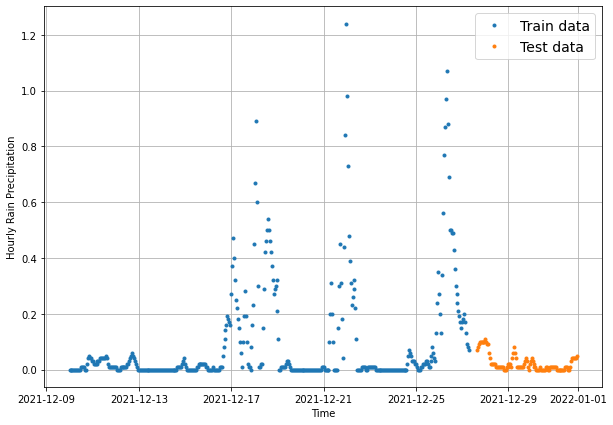

In [55]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_time_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_time_test, values=y_test, label="Test data")

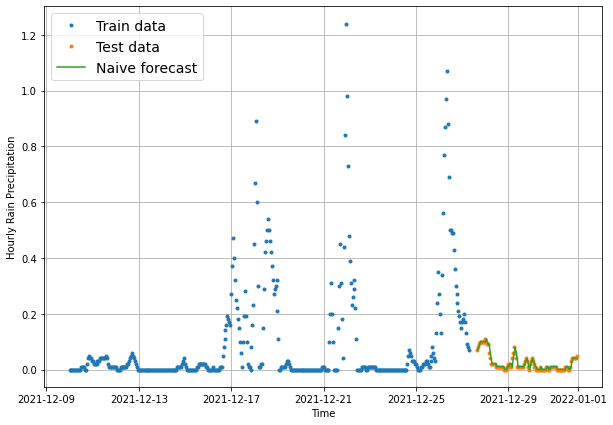

In [56]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_time_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_time_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_time_test[1:], values=naive_forecast, format="-", label="Naive forecast");

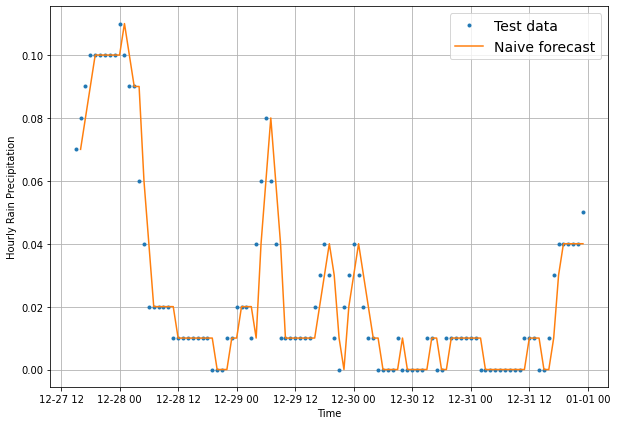

In [122]:
plt.figure(figsize=(10, 7))
offset = 10 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_time_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_time_test[1:], values=naive_forecast, format="-", label="Naive forecast");

In [58]:
import tensorflow as tf
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  # train_mae = tf.keras.metrics.mean_absolute_error(y_train, )
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),}

In [59]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 0.005769231,
 'mape': 673100.25,
 'mse': 9.230769e-05,
 'rmse': 0.0096076885}

### RandomForestRegressor

In [60]:
# Reducing data using max_samples
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
model = RandomForestRegressor(
    n_jobs=-1,
    # random_state=42,
    # max_samples=10000, #minimizes the data
)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [61]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((416, 28), (416,), (105, 28), (105,))

In [62]:
from tensorflow.python.ops.gen_math_ops import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def show_scores_sklearn(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test) 

    train_mae =  mean_absolute_error(y_train, train_preds)
    mae = mean_absolute_error(y_test, val_preds)
    train_mse = mean_squared_error(y_train, train_preds)
    mse = mean_squared_error(y_test, val_preds)
    train_rmse = sqrt(train_mse)
    rmse = sqrt(mse)
    train_mape = mean_absolute_percentage_error(y_train, train_preds)
    mape = mean_absolute_percentage_error(y_test, val_preds)
    return {"mae": mae,
            "train_mae": train_mae,
          "mse": mse,
          "train_mse": train_mse,
          "rmse": rmse.numpy(),
          "train_rmse": train_rmse.numpy(),
          "mape": mape,
          "train_mape": train_mape
          }

# Score model
random_forest = show_scores_sklearn(model)
random_forest

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.013312381137517237,
 'mape': 12725885691519.928,
 'mse': 0.00028144438617850573,
 'rmse': 0.016776304306327594,
 'train_mae': 0.011156009677573683,
 'train_mape': 2570083061646.7144,
 'train_mse': 0.000729645110356395,
 'train_rmse': 0.027011943846313523}

In [63]:
model.score(X_train, y_train), model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.9792010478912117, 0.6997189444650151)

In [64]:
train_preds = model.predict(X_train)
val_preds = model.predict(X_test) 

mean_absolute_error(y_test, val_preds)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.013312381137517237

In [65]:
naive_results

{'mae': 0.005769231,
 'mape': 673100.25,
 'mse': 9.230769e-05,
 'rmse': 0.0096076885}

#### Parameter Tuning

In [66]:


from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
    'n_estimators': np.arange(10, 100, 10),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [0.5, 1, 'sqrt', 'auto'],
    'max_samples': [332]
}

np.random.seed(42)
#instantiate ranomdized search cv model
rs_model = RandomizedSearchCV(
    RandomForestRegressor(
        n_jobs=-1,
    ),
    param_distributions=rf_grid,
    n_iter=5,
    cv=5,
    verbose=True
)

#Fit the randomized search cv model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [332],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [67]:
rs_model.score(X_train, y_train), rs_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.7450490126415756, 0.4985649919945203)

In [68]:
random_forest_ideal = show_scores_sklearn(rs_model)
random_forest_ideal

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.015330532797300338,
 'mape': 8694699212660.576,
 'mse': 0.00046997992525730337,
 'rmse': 0.0216790203943191,
 'train_mae': 0.04183366665641622,
 'train_mape': 18992289392206.664,
 'train_mse': 0.00894389968944674,
 'train_rmse': 0.09457219300326465}

In [69]:
mae = []
mape = []
mse = []
rmse = []

In [70]:
mae.append(naive_results['mae'])
mae.append(random_forest['mae'])
mae.append(random_forest_ideal['mae'])

mape.append(naive_results['mape'])
mape.append(random_forest['mape'])
mape.append(random_forest_ideal['mape'])

mse.append(naive_results['mse'])
mse.append(random_forest['mse'])
mse.append(random_forest_ideal['mse'])

rmse.append(naive_results['rmse'])
rmse.append(random_forest['rmse'])
rmse.append(random_forest_ideal['rmse'])

In [71]:
models = []

In [72]:
models.append('Naive')
models.append('Random Forest')
models.append('Random Forest Randomized Search')

In [73]:
scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.005769,6.731002e+05,0.000092,0.009608
1,Random Forest,0.013312,1.272589e+13,0.000281,0.016776
2,Random Forest Randomized Search,0.015331,8.694699e+12,0.000470,0.021679


### KNeighboursRegressor


In [74]:
from sklearn.neighbors import KNeighborsRegressor

In [75]:
np.random.seed(42)
k_model = KNeighborsRegressor(
    n_jobs=-1,
    #n_neighbors=2,
    # random_state=42,
    # max_samples=10000, #minimizes the data
)

# X_train = np.asarray(X_train)
# y_train = np.asarray(y_train)
k_model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1)

In [76]:
k_model.score(X_train, y_train), k_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.7023217680609357, -33.25121207579849)

In [77]:
k_scores = show_scores_sklearn(k_model)
k_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.101333335,
 'mape': 108686865000000.0,
 'mse': 0.03210263,
 'rmse': 0.17917207,
 'train_mae': 0.049615383,
 'train_mape': 40987090000000.0,
 'train_mse': 0.010442808,
 'train_rmse': 0.102190055}

In [78]:
rf_k_params = {
    'n_neighbors': [1, 3, 5, 10, 20],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50, 60]
}

np.random.seed(42)
rs_k_model = RandomizedSearchCV(
    KNeighborsRegressor(
        n_jobs=-1,
        #random_state=42,
    ),
    param_distributions=rf_k_params,
    n_iter=5,
    cv=5,
    verbose=True
)

#Fit the randomized search cv model
rs_k_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1), n_iter=5,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [20, 30, 40, 50, 60],
                                        'n_neighbors': [1, 3, 5, 10, 20]},
                   verbose=True)

In [79]:
rs_k_model.score(X_train, y_train), rs_k_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(1.0, -33.60913300207516)

In [80]:
knr_ideal = show_scores_sklearn(rs_k_model)
knr_ideal

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.09257143,
 'mape': 100365945000000.0,
 'mse': 0.0324381,
 'rmse': 0.1801058,
 'train_mae': 0.0,
 'train_mape': 0.0,
 'train_mse': 0.0,
 'train_rmse': 0.0}

In [81]:
models.append('KNeighboursRegressor')
models.append('KNeighboursRegressor Randomized Search')

mae.append(k_scores['mae'])
mape.append(k_scores['mape'])
mse.append(k_scores['mse']) 
rmse.append(k_scores['rmse'])

mae.append(knr_ideal['mae'])
mape.append(knr_ideal['mape'])
mse.append(knr_ideal['mse']) 
rmse.append(knr_ideal['rmse']) 

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.005769,6.731002e+05,0.000092,0.009608
1,Random Forest,0.013312,1.272589e+13,0.000281,0.016776
2,Random Forest Randomized Search,0.015331,8.694699e+12,0.000470,0.021679
3,KNeighboursRegressor,0.101333,1.086869e+14,0.032103,0.179172
4,KNeighboursRegressor Randomized Search,0.092571,1.003659e+14,0.032438,0.180106


### Support Vector Regressor

In [82]:
from sklearn.svm import SVR

In [83]:
np.random.seed(42)
svr_model = SVR()

# X_train = np.asarray(X_train)|
# y_train = np.asarray(y_train)
svr_model.fit(X_train, y_train)

SVR()

In [84]:
svr_model.score(X_train, y_train), svr_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.005467028350361058, -6.240230461894922)

In [85]:
svr_scores = show_scores_sklearn(svr_model)
svr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.07683887398657722,
 'mape': 112997695445044.89,
 'mse': 0.0067860498708734755,
 'rmse': 0.08237748400426828,
 'train_mae': 0.12794034859660497,
 'train_mape': 180700673123132.06,
 'train_mse': 0.03488907114439473,
 'train_rmse': 0.18678616422100094}

In [86]:
rf_svr_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [1, 3, 5, 7, 9],
    'epsilon': [0.1, 0.3, 0.5, 0.7, 0.9],
    'C': [1, 3, 5, 7, 9], 
}

np.random.seed(42)
rs_svr_model = RandomizedSearchCV(
    SVR(),
    param_distributions=rf_svr_params,
    n_iter=5,
    cv=5,
    verbose=True
)

# X_train = np.asarray(X_train)
# y_train = np.asarray(y_train)
#Fit the randomized search cv model
rs_svr_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=5,
                   param_distributions={'C': [1, 3, 5, 7, 9],
                                        'degree': [1, 3, 5, 7, 9],
                                        'epsilon': [0.1, 0.3, 0.5, 0.7, 0.9],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=True)

In [87]:
rs_svr_model.score(X_train, y_train), rs_svr_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(-1.316024155371554, -130.87463643573753)

In [88]:
rs_svr_scores = show_scores_sklearn(rs_svr_model)
rs_svr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.3370340790473201,
 'mape': 404985832198621.1,
 'mse': 0.12360212347743511,
 'rmse': 0.3515709366222343,
 'train_mae': 0.2526624478864663,
 'train_mape': 489888471264007.3,
 'train_mse': 0.0812481172895302,
 'train_rmse': 0.28504055376302195}

In [89]:
models.append('Support Vector Regression')
models.append('Support Vector Regression Randomized Search')

mae.append(svr_scores['mae'])
mape.append(svr_scores['mape'])
mse.append(svr_scores['mse']) 
rmse.append(svr_scores['rmse'])

mae.append(rs_svr_scores['mae'])
mape.append(rs_svr_scores['mape'])
mse.append(rs_svr_scores['mse']) 
rmse.append(rs_svr_scores['rmse']) 

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.005769,6.731002e+05,0.000092,0.009608
1,Random Forest,0.013312,1.272589e+13,0.000281,0.016776
2,Random Forest Randomized Search,0.015331,8.694699e+12,0.000470,0.021679
3,KNeighboursRegressor,0.101333,1.086869e+14,0.032103,0.179172
4,KNeighboursRegressor Randomized Search,0.092571,1.003659e+14,0.032438,0.180106
5,Support Vector Regression,0.076839,1.129977e+14,0.006786,0.082377
6,Support Vector Regression Randomized Search,0.337034,4.049858e+14,0.123602,0.351571


### Ensemble Methods

#### Combining RFR, KNR, and SVR

In [90]:
from sklearn.ensemble import VotingRegressor

In [91]:
vr_model = VotingRegressor(
    estimators=[
        ('rfr', rs_model),
        ('knr', rs_k_model),
        ('svr', rs_svr_model),
    ]
)

np.random.seed(42)
# X_train_dot = np.dot(X_train, X_train.T)
# X_test_dot = np.dot(X_test, X_train.T)
vr_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


VotingRegressor(estimators=[('rfr',
                             RandomizedSearchCV(cv=5,
                                                estimator=RandomForestRegressor(n_jobs=-1),
                                                n_iter=5,
                                                param_distributions={'max_depth': [None,
                                                                                   3,
                                                                                   5,
                                                                                   10],
                                                                     'max_features': [0.5,
                                                                                      1,
                                                                                      'sqrt',
                                                                                      'auto'],
                                          

In [92]:
vr_model.score(X_train, y_train), vr_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.7005574827891567, -5.915626681476128)

In [93]:
vr_scores = show_scores_sklearn(vr_model)
vr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.05970004291449988,
 'mape': 75828548752944.97,
 'mse': 0.006481808527481281,
 'rmse': 0.08050967971294683,
 'train_mae': 0.05957360375578798,
 'train_mape': 75190414062705.14,
 'train_mse': 0.010504700783621876,
 'train_rmse': 0.10249244256832733}

In [94]:
models.append('VotingRegressor')

mae.append(vr_scores['mae'])
mape.append(vr_scores['mape'])
mse.append(vr_scores['mse']) 
rmse.append(vr_scores['rmse'])

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.005769,6.731002e+05,0.000092,0.009608
1,Random Forest,0.013312,1.272589e+13,0.000281,0.016776
2,Random Forest Randomized Search,0.015331,8.694699e+12,0.000470,0.021679
3,KNeighboursRegressor,0.101333,1.086869e+14,0.032103,0.179172
4,KNeighboursRegressor Randomized Search,0.092571,1.003659e+14,0.032438,0.180106
5,Support Vector Regression,0.076839,1.129977e+14,0.006786,0.082377
6,Support Vector Regression Randomized Search,0.337034,4.049858e+14,0.123602,0.351571
7,VotingRegressor,0.059700,7.582855e+13,0.006482,0.080510


#### GradientTreeBoosting Regressor

In [95]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [96]:
np.random.seed(42)
gbr_model = GradientBoostingRegressor()

gbr_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [97]:
gbr_scores = show_scores_sklearn(gbr_model)
gbr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.011150165356852912,
 'mape': 8590427387098.071,
 'mse': 0.0002031715338628958,
 'rmse': 0.014253825236156637,
 'train_mae': 0.007980873665494336,
 'train_mape': 6261824194836.439,
 'train_mse': 0.0001580161521175065,
 'train_rmse': 0.012570447570293847}

In [98]:
models.append('GradientTreeBoosting Regressor')

mae.append(gbr_scores['mae'])
mape.append(gbr_scores['mape'])
mse.append(gbr_scores['mse']) 
rmse.append(gbr_scores['rmse'])

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.005769,6.731002e+05,0.000092,0.009608
1,Random Forest,0.013312,1.272589e+13,0.000281,0.016776
2,Random Forest Randomized Search,0.015331,8.694699e+12,0.000470,0.021679
3,KNeighboursRegressor,0.101333,1.086869e+14,0.032103,0.179172
4,KNeighboursRegressor Randomized Search,0.092571,1.003659e+14,0.032438,0.180106
5,Support Vector Regression,0.076839,1.129977e+14,0.006786,0.082377
6,Support Vector Regression Randomized Search,0.337034,4.049858e+14,0.123602,0.351571
7,VotingRegressor,0.059700,7.582855e+13,0.006482,0.080510
8,GradientTreeBoosting Regressor,0.011150,8.590427e+12,0.000203,0.014254


In [99]:
np.random.seed(42)
rf_gbr_params = {
    'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'n_estimators': [100, 200, 400, 800, 1000, 1600],
    'criterion': ['friedman_mse', 'squared_error', 'absolute_error'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1, 3, 5, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20],
    'learning_rate': [0.1, 0.001, 0.005, 0.0001]
}

rs_gbr_model = RandomizedSearchCV(
    GradientBoostingRegressor(),
    param_distributions=rf_gbr_params,
    n_iter=5,
    cv=5,
    verbose=True
)

#Fit the randomized search cv model
rs_gbr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  FutureWarning,


Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning: criterion='mae' was deprecated in 

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=5,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error',
                                                      'absolute_error'],
                                        'learning_rate': [0.1, 0.001, 0.005,
                                                          0.0001],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [1, 3, 5, 10, 20, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10, 20],
                                        'n_estimators': [100, 200, 400, 8

In [100]:
rs_gbr_scores = show_scores_sklearn(rs_gbr_model)
rs_gbr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.03748164556776014,
 'mape': 43462017046243.875,
 'mse': 0.001768300048340665,
 'rmse': 0.04205115989292882,
 'train_mae': 0.018121074312188557,
 'train_mape': 2249370700562.6855,
 'train_mse': 0.0035944270140010654,
 'train_rmse': 0.059953540462603754}

In [101]:
models.append('GradientTreeBoosting Regressor Randomized Search')

mae.append(rs_gbr_scores['mae'])
mape.append(rs_gbr_scores['mape'])
mse.append(rs_gbr_scores['mse']) 
rmse.append(rs_gbr_scores['rmse'])

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.005769,6.731002e+05,0.000092,0.009608
1,Random Forest,0.013312,1.272589e+13,0.000281,0.016776
2,Random Forest Randomized Search,0.015331,8.694699e+12,0.000470,0.021679
3,KNeighboursRegressor,0.101333,1.086869e+14,0.032103,0.179172
4,KNeighboursRegressor Randomized Search,0.092571,1.003659e+14,0.032438,0.180106
5,Support Vector Regression,0.076839,1.129977e+14,0.006786,0.082377
6,Support Vector Regression Randomized Search,0.337034,4.049858e+14,0.123602,0.351571
7,VotingRegressor,0.059700,7.582855e+13,0.006482,0.080510
8,GradientTreeBoosting Regressor,0.011150,8.590427e+12,0.000203,0.014254
9,GradientTreeBoosting Regressor Randomized Search,0.037482,4.346202e+13,0.001768,0.042051


### Plotting best model evaluations

In [102]:
# Plot forecasts
rs_forecast = model.predict(X_test)
rs_ideal_forecast = rs_model.predict(X_test)
k_forecast = k_model.predict(X_test)
rs_k_forecast = rs_k_model.predict(X_test)
svr_forecast = svr_model.predict(X_test)
rs_svr_forecast = rs_svr_model.predict(X_test) 
vr_forecast = vr_model.predict(X_test)
gbr_forecast = gbr_model.predict(X_test)
rs_gbr_forecast = rs_gbr_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

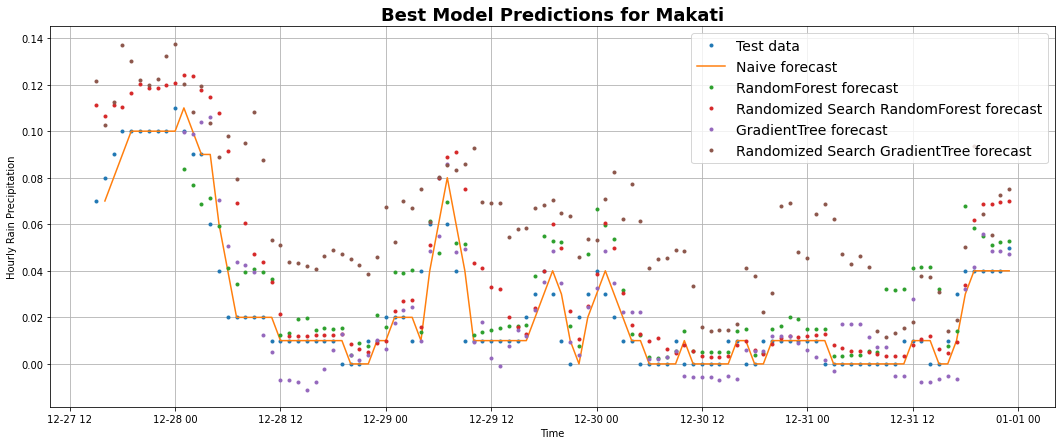

In [103]:
plt.figure(figsize=(18, 7))
offset = 10 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_time_test,  values=y_test, label="Test data")
plot_time_series(timesteps=X_time_test[1:], values=naive_forecast, format="-",  label="Naive forecast")
plot_time_series(timesteps=X_time_test, start=offset, values=rs_forecast, label='RandomForest forecast')
plot_time_series(timesteps=X_time_test,  values=rs_ideal_forecast, label='Randomized Search RandomForest forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=k_forecast, label='KNR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_k_forecast, label='Ideal KNR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=svr_forecast, label='SVR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_svr_forecast, label='Ideal SVR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=vr_forecast, label='VotingRegressor forecast')
plot_time_series(timesteps=X_time_test, start=offset, values=gbr_forecast, label='GradientTree forecast')
plot_time_series(timesteps=X_time_test, values=rs_gbr_forecast, label='Randomized Search GradientTree forecast')
plt.title('Best Model Predictions for Makati', fontsize=18, fontweight='bold')

plt.show();

 ### Feature importance

In [104]:
rs_gbr_model.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'absolute_error',
 'max_depth': 50,
 'max_features': 'log2',
 'min_samples_leaf': 20,
 'n_estimators': 400}

In [105]:
np.random.seed(42)
best_gbr_model = GradientBoostingRegressor(
    criterion='friedman_mse',
    learning_rate=0.1,
    loss='absolute_error',
    max_depth=50,
    max_features='auto',
    min_samples_leaf=20,
    n_estimators=1800,
)

best_gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(loss='absolute_error', max_depth=50,
                          max_features='auto', min_samples_leaf=20,
                          n_estimators=1800)

In [106]:
best_gbr_scores = show_scores_sklearn(best_gbr_model)
best_gbr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.007795243486115662,
 'mape': 3525184257359.402,
 'mse': 0.00013318160352518568,
 'rmse': 0.011540433420161726,
 'train_mae': 0.013601949049220203,
 'train_mape': 373527320702.1322,
 'train_mse': 0.002587928595041562,
 'train_rmse': 0.050871687558420566}

In [107]:
models.append('GradientTreeBoosting Regressor Manually Tuned')

mae.append(best_gbr_scores['mae'])
mape.append(best_gbr_scores['mape'])
mse.append(best_gbr_scores['mse']) 
rmse.append(best_gbr_scores['rmse'])

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.005769,6.731002e+05,0.000092,0.009608
1,Random Forest,0.013312,1.272589e+13,0.000281,0.016776
2,Random Forest Randomized Search,0.015331,8.694699e+12,0.000470,0.021679
3,KNeighboursRegressor,0.101333,1.086869e+14,0.032103,0.179172
4,KNeighboursRegressor Randomized Search,0.092571,1.003659e+14,0.032438,0.180106
5,Support Vector Regression,0.076839,1.129977e+14,0.006786,0.082377
6,Support Vector Regression Randomized Search,0.337034,4.049858e+14,0.123602,0.351571
7,VotingRegressor,0.059700,7.582855e+13,0.006482,0.080510
8,GradientTreeBoosting Regressor,0.011150,8.590427e+12,0.000203,0.014254
9,GradientTreeBoosting Regressor Randomized Search,0.037482,4.346202e+13,0.001768,0.042051


In [108]:
best_gbr_forecast = best_gbr_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


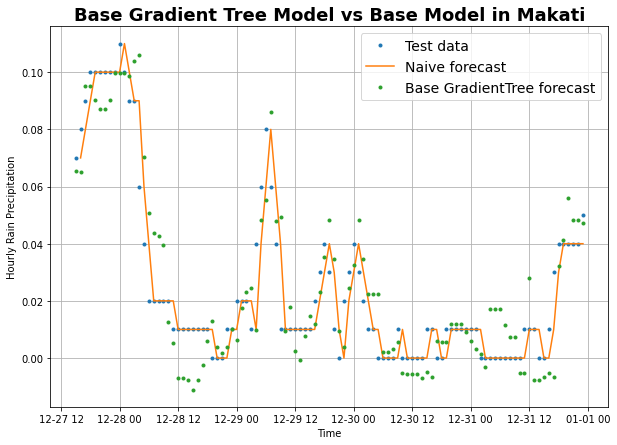

In [128]:
plt.figure(figsize=(10, 7))
offset = 10 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_time_test,  values=y_test, label="Test data")
plot_time_series(timesteps=X_time_test[1:], values=naive_forecast, format="-",  label="Naive forecast")
# plot_time_series(timesteps=X_time_test, values=rs_forecast, label='RandomForest forecast')
# plot_time_series(timesteps=X_time_test,   values=rs_ideal_forecast, label='Randomized Search RandomForest forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=k_forecast, label='KNR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_k_forecast, label='Ideal KNR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=svr_forecast, label='SVR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_svr_forecast, label='Ideal SVR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=vr_forecast, label='VotingRegressor forecast')
plot_time_series(timesteps=X_time_test, values=gbr_forecast, label='Base GradientTree forecast')
# plot_time_series(timesteps=X_time_test,  values=rs_gbr_forecast, label='Randomized Search GradientTree forecast')
# plot_time_series(timesteps=X_time_test,  values=best_gbr_forecast, label='Best GradientTree forecast')
plt.title('Base Gradient Tree Model vs Base Model in Makati', fontsize=18, fontweight='bold')

plt.show();

Text(0.5, 1.0, 'Manually Tuned Gradient Tree Model vs Base \nGradient Tree Model vs Base Model in Makati')

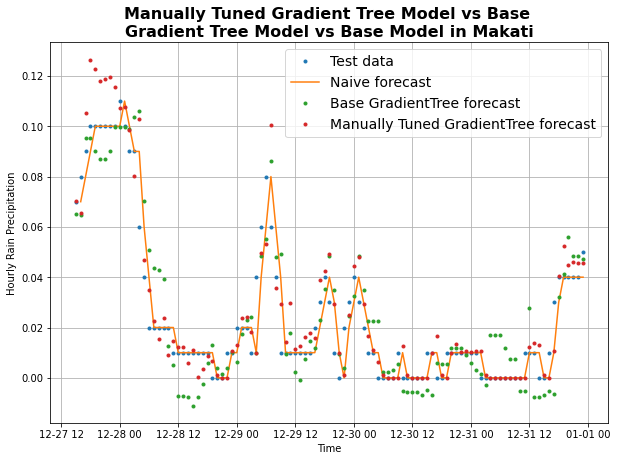

In [132]:
plt.figure(figsize=(10, 7))
offset = 10 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_time_test,  values=y_test, label="Test data")
plot_time_series(timesteps=X_time_test[1:], values=naive_forecast, format="-", label="Naive forecast");
plot_time_series(timesteps=X_time_test,  values=gbr_forecast, label='Base GradientTree forecast')
plot_time_series(timesteps=X_time_test,  values=best_gbr_forecast, label='Manually Tuned GradientTree forecast')
plt.title('Manually Tuned Gradient Tree Model vs Base \nGradient Tree Model vs Base Model in Makati', fontsize=16, fontweight='bold')

In [ ]:
best_gbr_model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.01291869,
       0.00181248, 0.00528008, 0.02170705, 0.01989679, 0.00225814,
       0.05316822, 0.02849532, 0.0253533 , 0.01746418, 0.        ,
       0.00690872, 0.        , 0.        , 0.00795176, 0.03766903,
       0.00368655, 0.66167107, 0.01068674, 0.01199776, 0.01067595,
       0.0130246 , 0.03652388, 0.0108497 ])

In [ ]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({
        'features': columns,
        'feature_importances': importances
    }).sort_values('feature_importances', ascending=False).reset_index(drop=True))

    #plot df
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()
    plt.title('Feature Importance in Makati', fontweight='bold', fontsize=14)

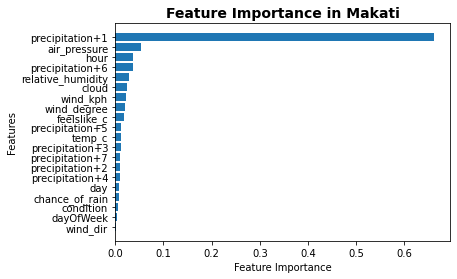

In [ ]:
plot_features(X_columns, best_gbr_model.feature_importances_)

In [ ]:
scores

,models,mae,mape,mse,rmse
0,Naive,0.005769,6.731002e+05,0.000092,0.009608
1,Random Forest,0.013312,1.272589e+13,0.000281,0.016776
2,Random Forest Randomized Search,0.015331,8.694699e+12,0.000470,0.021679
3,KNeighboursRegressor,0.101333,1.086869e+14,0.032103,0.179172
4,KNeighboursRegressor Randomized Search,0.092571,1.003659e+14,0.032438,0.180106
5,Support Vector Regression,0.076839,1.129977e+14,0.006786,0.082377
6,Support Vector Regression Randomized Search,0.337034,4.049858e+14,0.123602,0.351571
7,VotingRegressor,0.059700,7.582855e+13,0.006482,0.080510
8,GradientTreeBoosting Regressor,0.011150,8.590427e+12,0.000203,0.014254
9,GradientTreeBoosting Regressor Randomized Search,0.037482,4.346202e+13,0.001768,0.042051


In [ ]:
 !jupyter nbconvert --to html /content/drive/MyDrive/prac-research/actual/RandomForrestRegressor/Makati.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/prac-research/actual/RandomForrestRegressor/Makati.ipynb to html
[NbConvertApp] Writing 842296 bytes to /content/drive/MyDrive/prac-research/actual/RandomForrestRegressor/Makati.html
